# EC - COVID-19 India Matplotlib Overview (Updated Daily)
> Tracking coronavirus total cases, deaths and new cases in India

- branch: master
- badges: true
- comments: true
- author: PrasannaDK
- categories: [fastpages, jupyter]
- date: 2020-08-08

In [137]:
#hide

## Import essential packages below

import pandas as pd
import numpy as np
import requests
#import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
from datetime import datetime
%matplotlib inline

In [138]:
#hide
#httpRequest = requests.get('https://api.covid19india.org/csv/latest/state_wise.csv')

In [139]:
#hide
#httpResponse = httpRequest.content
#httpResponse

In [140]:
#hide
# csv_file = open('data/downloaded_Snapshot.csv', 'wb')
# csv_file.write(httpResponse)
# csv_file.close()

In [141]:
#hide
#dft_downloaded = pd.read_csv('data/downloaded_Snapshot.csv', 'wb')

In [142]:
#hide
#Getting Json Data
httpRequest = requests.get('https://api.covid19india.org/states_daily.json')

In [143]:
#hide
httpResponse = httpRequest.json()
httpResponse['states_daily'][-1:-4:-1]
#Contains daily counts for all states as individual properties

[{'an': '1',
  'ap': '97',
  'ar': '0',
  'as': '8',
  'br': '19',
  'ch': '1',
  'ct': '3',
  'date': '08-Aug-20',
  'dd': '0',
  'dl': '16',
  'dn': '0',
  'ga': '2',
  'gj': '23',
  'hp': '0',
  'hr': '7',
  'jh': '9',
  'jk': '10',
  'ka': '93',
  'kl': '4',
  'la': '0',
  'ld': '0',
  'mh': '275',
  'ml': '1',
  'mn': '1',
  'mp': '15',
  'mz': '0',
  'nl': '0',
  'or': '15',
  'pb': '23',
  'py': '5',
  'rj': '11',
  'sk': '0',
  'status': 'Deceased',
  'tg': '14',
  'tn': '118',
  'tr': '1',
  'tt': '875',
  'un': '0',
  'up': '47',
  'ut': '5',
  'wb': '51'},
 {'an': '75',
  'ap': '9151',
  'ar': '104',
  'as': '1782',
  'br': '2408',
  'ch': '52',
  'ct': '263',
  'date': '08-Aug-20',
  'dd': '0',
  'dl': '1130',
  'dn': '51',
  'ga': '207',
  'gj': '1135',
  'hp': '127',
  'hr': '587',
  'jh': '834',
  'jk': '449',
  'ka': '5006',
  'kl': '1715',
  'la': '20',
  'ld': '0',
  'mh': '11081',
  'ml': '12',
  'mn': '1',
  'mp': '732',
  'mz': '8',
  'nl': '69',
  'or': '1544',
  

In [144]:
#hide
raw_json = httpResponse['states_daily'].copy()
raw_json[0]

{'an': '0',
 'ap': '1',
 'ar': '0',
 'as': '0',
 'br': '0',
 'ch': '0',
 'ct': '0',
 'date': '14-Mar-20',
 'dd': '0',
 'dl': '7',
 'dn': '0',
 'ga': '0',
 'gj': '0',
 'hp': '0',
 'hr': '14',
 'jh': '0',
 'jk': '2',
 'ka': '6',
 'kl': '19',
 'la': '0',
 'ld': '0',
 'mh': '14',
 'ml': '0',
 'mn': '0',
 'mp': '0',
 'mz': '0',
 'nl': '0',
 'or': '0',
 'pb': '1',
 'py': '0',
 'rj': '3',
 'sk': '0',
 'status': 'Confirmed',
 'tg': '1',
 'tn': '1',
 'tr': '0',
 'tt': '81',
 'un': '0',
 'up': '12',
 'ut': '0',
 'wb': '0'}

In [145]:
#hide
dt_today = raw_json[-1]['date']    #Getting the Latest day from the downloaded json
dt_yday = raw_json[-4]['date']    #And Getting the Previous day
dt_today, dt_yday

('08-Aug-20', '07-Aug-20')

In [146]:
#hide
#Generating a Pandas Dataframe from the Json Object
dft_cases, dft_deaths = pd.DataFrame(), pd.DataFrame()
for i in range(0, len(raw_json)):
    jsonObj = raw_json[i]
    date = jsonObj.pop('date', 'None')
    status = jsonObj.pop('status', 'None')
    del jsonObj['tt']
    dft = pd.DataFrame(data = jsonObj.values(), index = jsonObj.keys(), columns = [date], dtype=np.int64) 
    if status == 'Confirmed':
        #print('conf')
        dft_cases = pd.concat([dft_cases, dft], axis=1)
    elif status == 'Deceased':
        dft_deaths = pd.concat([dft_deaths, dft], axis=1)
dft_cases.head(), dft_deaths.head()        

(    14-Mar-20  15-Mar-20  16-Mar-20  17-Mar-20  18-Mar-20  19-Mar-20  \
 an          0          0          0          0          0          0   
 ap          1          0          0          0          0          2   
 ar          0          0          0          0          0          0   
 as          0          0          0          0          0          0   
 br          0          0          0          0          0          0   
 
     20-Mar-20  21-Mar-20  22-Mar-20  23-Mar-20  ...  30-Jul-20  31-Jul-20  \
 an          0          0          0          0  ...         42         78   
 ap          0          2          1          1  ...      10167      10376   
 ar          0          0          0          0  ...         74        107   
 as          0          0          0          0  ...       2112       1862   
 br          0          0          2          1  ...       2082       2986   
 
     01-Aug-20  02-Aug-20  03-Aug-20  04-Aug-20  05-Aug-20  06-Aug-20  \
 an         88   

In [147]:
#hide
#Creating a cumulative table
dft_cases = dft_cases.cumsum(axis = 1, skipna = True)
dft_cases

,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,...,30-Jul-20,31-Jul-20,01-Aug-20,02-Aug-20,03-Aug-20,04-Aug-20,05-Aug-20,06-Aug-20,07-Aug-20,08-Aug-20
an,0,0,0,0,0,0,0,0,0,0,...,466,544,632,730,826,924,1023,1119,1218,1347
ap,1,1,1,1,1,3,3,5,6,7,...,130557,140933,150209,158764,166586,176333,186461,196789,206960,217040
ar,0,0,0,0,0,0,0,0,0,0,...,1484,1591,1674,1698,1758,1790,1855,1948,2049,2117
as,0,0,0,0,0,0,0,0,0,0,...,38306,40168,41625,42803,45174,48060,50344,52716,55395,57613
br,0,0,0,0,0,0,0,0,2,3,...,48001,50987,54508,57270,59567,62031,64732,68148,71794,75786
ch,0,0,0,0,0,1,5,5,6,7,...,1016,1051,1079,1117,1160,1206,1270,1327,1374,1426
ct,0,0,0,0,0,1,1,1,1,1,...,8856,9192,9427,9608,9820,10202,10497,11020,11408,11855
dd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dl,7,7,7,8,10,14,20,27,27,30,...,134403,135598,136716,137677,138482,139156,140232,141531,142723,144127
dn,0,0,0,0,0,0,0,0,0,0,...,1105,1151,1196,1251,1286,1329,1374,1417,1461,1512


In [148]:
#hide
dft_deaths = dft_deaths.cumsum(axis = 1, skipna = True)
dft_deaths

,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,...,30-Jul-20,31-Jul-20,01-Aug-20,02-Aug-20,03-Aug-20,04-Aug-20,05-Aug-20,06-Aug-20,07-Aug-20,08-Aug-20
an,0,0,0,0,0,0,0,0,0,0,...,3,5,7,8,10,12,14,16,19,20
ap,0,0,0,0,0,0,0,0,0,0,...,1281,1349,1407,1474,1537,1604,1681,1753,1842,1939
ar,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
as,0,0,0,0,0,0,0,0,0,0,...,98,102,105,109,113,119,125,130,136,144
br,0,0,0,0,0,0,0,0,1,1,...,285,298,312,322,336,349,369,388,400,419
ch,0,0,0,0,0,0,0,0,0,0,...,14,15,18,19,19,20,20,20,23,24
ct,0,0,0,0,0,0,0,0,0,0,...,51,54,55,58,61,69,71,77,87,90
dd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dl,1,1,1,1,1,1,1,1,1,1,...,3936,3963,3989,4004,4021,4033,4044,4059,4082,4098
dn,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [149]:
#hide
dft_cases = dft_cases.reset_index().rename(columns={'index':'states'})
dft_deaths = dft_deaths.reset_index().rename(columns={'index':'states'})
dft_cases, dft_deaths

(   states  14-Mar-20  15-Mar-20  16-Mar-20  17-Mar-20  18-Mar-20  19-Mar-20  \
 0      an          0          0          0          0          0          0   
 1      ap          1          1          1          1          1          3   
 2      ar          0          0          0          0          0          0   
 3      as          0          0          0          0          0          0   
 4      br          0          0          0          0          0          0   
 5      ch          0          0          0          0          0          1   
 6      ct          0          0          0          0          0          1   
 7      dd          0          0          0          0          0          0   
 8      dl          7          7          7          8         10         14   
 9      dn          0          0          0          0          0          0   
 10     ga          0          0          0          0          0          0   
 11     gj          0          0        

In [150]:
#hide
dft_cases_old = pd.read_csv('data/SnapshotCases-28-July.csv')
dft_deaths_old = pd.read_csv('data/SnapshotDeaths-28-July.csv')

In [151]:
#hide
dft_cases_old.head()

,states,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,...,19-Jul-20,20-Jul-20,21-Jul-20,22-Jul-20,23-Jul-20,24-Jul-20,25-Jul-20,26-Jul-20,27-Jul-20,28-Jul-20
0,Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,...,199,203,208,217,236,255,286,314,334,359
1,Andhra Pradesh,1,1,1,1,1,3,3,5,6,...,49650,53724,58668,64713,72711,80858,88671,96298,102349,110297
2,Arunachal Pradesh,0,0,0,0,0,0,0,0,0,...,740,790,858,949,991,1056,1126,1158,1239,1330
3,Assam,0,0,0,0,0,0,0,0,0,...,23898,24991,26671,27643,28690,29820,30985,32127,33475,34846
4,Bihar,0,0,0,0,0,0,0,0,2,...,26379,27455,28564,30066,31691,33511,36314,38919,41111,43591


In [152]:
#hide
dft_deaths_old.head()

,states,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,...,19-Jul-20,20-Jul-20,21-Jul-20,22-Jul-20,23-Jul-20,24-Jul-20,25-Jul-20,26-Jul-20,27-Jul-20,28-Jul-20
0,Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,Andhra Pradesh,0,0,0,0,0,0,0,0,0,...,642,696,758,823,884,933,985,1041,1090,1148
2,Arunachal Pradesh,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
3,Assam,0,0,0,0,0,0,0,0,0,...,61,62,68,70,74,80,81,83,90,92
4,Bihar,0,0,0,0,0,0,0,0,1,...,179,187,198,208,212,221,232,249,255,269


In [153]:
#hide
dt_today_old = '28-Jul-20'
dt_yday_old = '27-Jul-20'

In [154]:
#hide
#Comparing to previous (given) data to ensure correctness

# Get the latest count of the total number of cases for each state across India, and also one from a day before

#Here past cases are a day earlier, but this can be changed
dfc_cases_old = dft_cases_old.groupby('states')[dt_today_old].sum()
dfc_deaths_old = dft_deaths_old.groupby('states')[dt_today_old].sum()
dfp_cases_old = dft_cases_old.groupby('states')[dt_yday_old].sum()
dfp_deaths_old = dft_deaths_old.groupby('states')[dt_yday_old].sum()

dfc_cases = dft_cases.groupby('states')[dt_today_old].sum()
dfc_deaths = dft_deaths.groupby('states')[dt_today_old].sum()
dfp_cases = dft_cases.groupby('states')[dt_yday_old].sum()
dfp_deaths = dft_deaths.groupby('states')[dt_yday_old].sum()

In [155]:
#hide
dfc_cases, dfc_cases_old    #It seems to be the same

(states
 an       359
 ap    110297
 ar      1330
 as     34846
 br     43591
 ch       934
 ct      8286
 dd         0
 dl    132275
 dn      1032
 ga      5287
 gj     57982
 hp      2330
 hr     32876
 jh      9563
 jk     18879
 ka    107001
 kl     20895
 la      1327
 ld         0
 mh    391440
 ml       779
 mn      2317
 mp     29217
 mz       384
 nl      1460
 or     28107
 pb     14378
 py      3013
 rj     38636
 sk       592
 tg     57142
 tn    227688
 tr      4287
 un         0
 up     73951
 ut      6587
 wb     62964
 Name: 28-Jul-20, dtype: int64,
 states
 Andaman and Nicobar Islands       359
 Andhra Pradesh                 110297
 Arunachal Pradesh                1330
 Assam                           34846
 Bihar                           43591
 Chandigarh                        934
 Daman and Diu                       0
 Delhi                          132275
 Goa                              5287
 Gujarat                         57982
 Haryana                      

In [156]:
#hide
dfc_cases = dft_cases.groupby('states')[dt_today].sum()
dfc_deaths = dft_deaths.groupby('states')[dt_today].sum()
dfp_cases = dft_cases.groupby('states')[dt_yday].sum()
dfp_deaths = dft_deaths.groupby('states')[dt_yday].sum()

In [157]:
#hide
dfc_cases_series = pd.Series(dfc_cases, name="Cases")
dfc_deaths_series = pd.Series(dfc_deaths, name="Deaths")
dfp_cases_series = pd.Series(dfp_cases, name="PCases")
dfp_deaths_series = pd.Series(dfp_deaths, name="PDeaths")
df_table = pd.concat([dfc_cases_series, dfc_deaths_series, dfp_cases_series, dfp_deaths_series], axis=1)
df_table.head()

,Cases,Deaths,PCases,PDeaths
states,,,,
an,1347,20,1218,19
ap,217040,1939,206960,1842
ar,2117,3,2049,3
as,57613,144,55395,136
br,75786,419,71794,400


In [158]:
#hide
df_table.sort_values(by = ['Cases','Deaths'], ascending = [False, False], inplace=True)
df_table.head()

,Cases,Deaths,PCases,PDeaths
states,,,,
mh,503084,17366,490262,17091
tn,290907,4808,285024,4690
ap,217040,1939,206960,1842
ka,172102,3098,164924,3005
dl,144127,4098,142723,4082


In [159]:
#hide
df_table.reset_index(inplace=True)
df_table.head()

,states,Cases,Deaths,PCases,PDeaths
0,mh,503084,17366,490262,17091
1,tn,290907,4808,285024,4690
2,ap,217040,1939,206960,1842
3,ka,172102,3098,164924,3005
4,dl,144127,4098,142723,4082


In [160]:
#hide
for c in 'Cases, Deaths'.split(', '):
    df_table[f'{c} (+)'] = (df_table[c] - df_table[f'P{c}']).clip(0)
df_table['Fatality Rate'] = (100* df_table['Deaths']/ df_table['Cases']).round(2)

In [161]:
#hide
df_table.head()

,states,Cases,Deaths,PCases,PDeaths,Cases (+),Deaths (+),Fatality Rate
0,mh,503084,17366,490262,17091,12822,275,3.45
1,tn,290907,4808,285024,4690,5883,118,1.65
2,ap,217040,1939,206960,1842,10080,97,0.89
3,ka,172102,3098,164924,3005,7178,93,1.80
4,dl,144127,4098,142723,4082,1404,16,2.84


In [162]:
#hide
summary = dict()
summary['updated'] = datetime.now().strftime("%d-%b-%Y (%H:%M)")
summary['since'] = dt_yday
summary

{'updated': '09-Aug-2020 (13:34)', 'since': '07-Aug-20'}

In [163]:
#hide
df_table_mod = df_table.drop(['states', 'Fatality Rate'], axis = 1)
df_table_mod.head()

,Cases,Deaths,PCases,PDeaths,Cases (+),Deaths (+)
0,503084,17366,490262,17091,12822,275
1,290907,4808,285024,4690,5883,118
2,217040,1939,206960,1842,10080,97
3,172102,3098,164924,3005,7178,93
4,144127,4098,142723,4082,1404,16


In [164]:
#hide
for col_names, col_values in df_table_mod.iteritems():
    #print(col_names, col_values)
    summary[col_names] = col_values.sum()
summary

{'updated': '09-Aug-2020 (13:34)',
 'since': '07-Aug-20',
 'Cases': 2151931,
 'Deaths': 43465,
 'PCases': 2086775,
 'PDeaths': 42590,
 'Cases (+)': 65156,
 'Deaths (+)': 875}

In [165]:
#hide
overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<p style="text-align: center;">Last update: <strong>{update}</strong></p>
<p style="text-align: center;">Confirmed cases:</p>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<p style="text-align: center;">Confirmed deaths:</p>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>
'''

In [166]:
#hide
# Fill the above HTML with the information from the summary dictionary

update = summary['updated']
cases = summary['Cases']
new = summary['Cases (+)']
deaths = summary['Deaths']
dnew = summary['Deaths (+)']

html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew))

In [167]:
#hide
dt_cols = list(dft_cases.columns[1:])
dft_ct_new_cases = dft_cases.groupby('states')[dt_cols].sum().diff(axis=1).fillna(0).astype(int)
dft_ct_new_cases.sort_values(by = dt_today, ascending = False,inplace = True)

In [172]:
#hide_input
display(html)

{% cite covid19indiaorg2020tracker %}

In [169]:
#hide
dft_ct_new_cases.head()

,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,...,30-Jul-20,31-Jul-20,01-Aug-20,02-Aug-20,03-Aug-20,04-Aug-20,05-Aug-20,06-Aug-20,07-Aug-20,08-Aug-20
states,,,,,,,,,,,,,,,,,,,,,
mh,0,18,6,3,3,4,4,12,10,23,...,11147,10320,9601,9509,8968,7760,10309,11514,10483,12822
ap,0,0,0,0,0,2,0,2,1,1,...,10167,10376,9276,8555,7822,9747,10128,10328,10171,10080
ka,0,0,1,2,5,1,0,5,6,7,...,6128,5483,5172,5532,4752,6259,5619,6805,6670,7178
tn,0,0,0,0,1,1,0,3,3,3,...,5864,5881,5879,5875,5609,5063,5175,5684,5880,5883
up,0,1,0,2,2,3,4,4,2,2,...,3705,4422,3587,3873,4441,2948,4078,4586,4404,4660


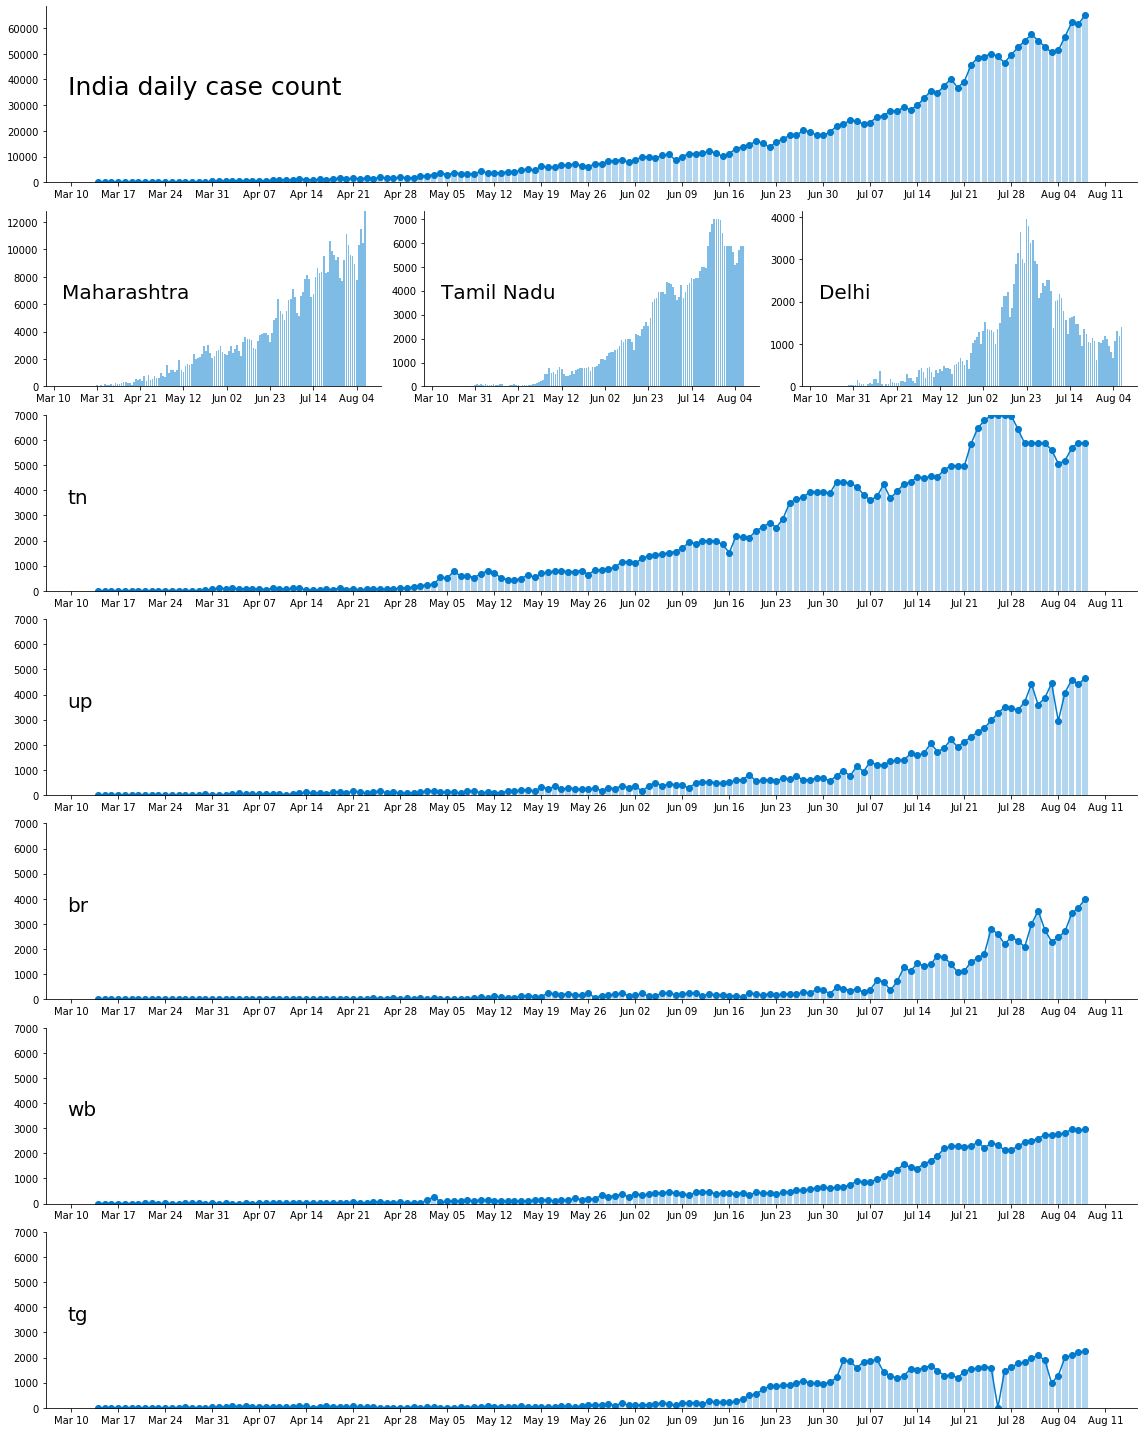

In [170]:
#hide_input
df = dft_ct_new_cases.copy()
df.loc['Total'] = df.sum()
n = 5
ax = []
fig = plt.figure(figsize = (16,20))
gs = fig.add_gridspec(n+2, 3)
# gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
ef = df.loc['Total'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax1.bar(ef.date,ef.Total,alpha=0.3,color='#007acc')
ax1.plot(ef.date,ef.Total , marker="o", color='#007acc')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.text(0.02, 0.5,'India daily case count', transform = ax1.transAxes, fontsize=25);
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = fig.add_subplot(gs[1,0])
ef = df.loc['mh'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')

ax2.bar(ef.date, ef.mh,color = '#007acc',alpha=0.5)
ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.set_xticks(ax2.get_xticks()[::3])
maxyval = ef.mh.max()
ax2.set_ylim([0,maxyval])
ax2.text(0.05, 0.5,'Maharashtra', transform = ax2.transAxes, fontsize=20);
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax3 = fig.add_subplot(gs[1,1])
ef = df.loc['tn'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax3.bar(ef.date, ef['tn'],color = '#007acc',alpha=0.5,)
ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_xticks(ax3.get_xticks()[::3])
ax3.text(0.05, 0.5,'Tamil Nadu', transform = ax3.transAxes, fontsize=20);
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax4 = fig.add_subplot(gs[1,2])
ef = df.loc['dl'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax4.bar(ef.date, ef.dl,color = '#007acc',alpha=0.5)
ax4.set_xticks([])
ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_xticks(ax4.get_xticks()[::3])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

ax4.text(0.05, 0.5,'Delhi', transform = ax4.transAxes, fontsize=20)

for i in range(n):
    
    ax.append(fig.add_subplot(gs[i+2,:]))
    ef = df.iloc[i+3].rename_axis('date').reset_index()
    ef['date'] = ef['date'].astype('datetime64[ns]')
    ax[i].bar(ef.date,ef.iloc[:,-1],color = '#007acc',alpha=0.3)
    ax[i].plot(ef.date,ef.iloc[:,-1],marker='o',color='#007acc')
    ax[i].text(0.02,0.5,f'{ef.columns.values[-1]}',transform = ax[i].transAxes, fontsize = 20);
    ax[i].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[i].set_ylim([0,7000])
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
plt.tight_layout()



In [171]:
#hide_input
print(df_table.to_string(index=False))

states   Cases  Deaths  PCases  PDeaths  Cases (+)  Deaths (+)  Fatality Rate
    mh  503084   17366  490262    17091      12822         275           3.45
    tn  290907    4808  285024     4690       5883         118           1.65
    ap  217040    1939  206960     1842      10080          97           0.89
    ka  172102    3098  164924     3005       7178          93           1.80
    dl  144127    4098  142723     4082       1404          16           2.84
    up  118038    2028  113378     1981       4660          47           1.72
    wb   92615    2005   89666     1954       2949          51           2.16
    tg   77513     615   75257      601       2256          14           0.79
    br   75786     419   71794      400       3992          19           0.55
    gj   69986    2628   68885     2605       1101          23           3.76
    as   57613     144   55395      136       2218           8           0.25
    rj   51328     778   50157      767       1171          11  

{% bibliography --cited %}

In [ ]:
#hide
#-Citations were added using BibTeX and jekyll-scholar